In [32]:
# ----------------------------
# Libraries and TensorFlow logging
# ----------------------------
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential

# Reduce TF info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')


In [41]:
import os
from PIL import Image

train_folder = "C:/Users/Lenovo/Downloads/archive (16)/Train"
val_folder   = "C:/Users/Lenovo/Downloads/archive (16)/Validation"

def clean_and_convert_to_rgb(folder_path):
    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            # Remove files with unsupported extensions
            if not file.lower().endswith(valid_extensions):
                os.remove(file_path)
                continue
            # Try opening and converting to RGB
            try:
                img = Image.open(file_path).convert("RGB")
                img.save(file_path)  # overwrite with RGB JPEG/PNG
            except:
                print("Removing unreadable file:", file_path)
                os.remove(file_path)

# Clean both folders
clean_and_convert_to_rgb(train_folder)
clean_and_convert_to_rgb(val_folder)
print("Cleaning done. Only readable RGB images remain.")



c:\Users\Lenovo\anaconda3\Lib\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Cleaning done. Only readable RGB images remain.


Found 15450 files belonging to 42 classes.
Found 3172 files belonging to 42 classes.
Classes: ['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Army worm', 'Becterial Blight in Rice', 'Brownspot', 'Common_Rust', 'Cotton Aphid', 'Flag Smut', 'Gray_Leaf_Spot', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Curl', 'Leaf smut', 'Mosaic sugarcane', 'RedRot sugarcane', 'RedRust sugarcane', 'Rice Blast', 'Sugarcane Healthy', 'Tungro', 'Wheat Brown leaf Rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust', 'Wheat leaf blight', 'Wheat mite', 'Wheat powdery mildew', 'Wheat scab', 'Wheat___Yellow_Rust', 'Wilt', 'Yellow Rust Sugarcane', 'bacterial_blight in Cotton', 'bollrot on Cotton', 'bollworm on Cotton', 'cotton mealy bug', 'cotton whitefly', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'pink bollworm in cotton', 'red cotton bug', 'thirps on  cotton']
Number of classes: 42


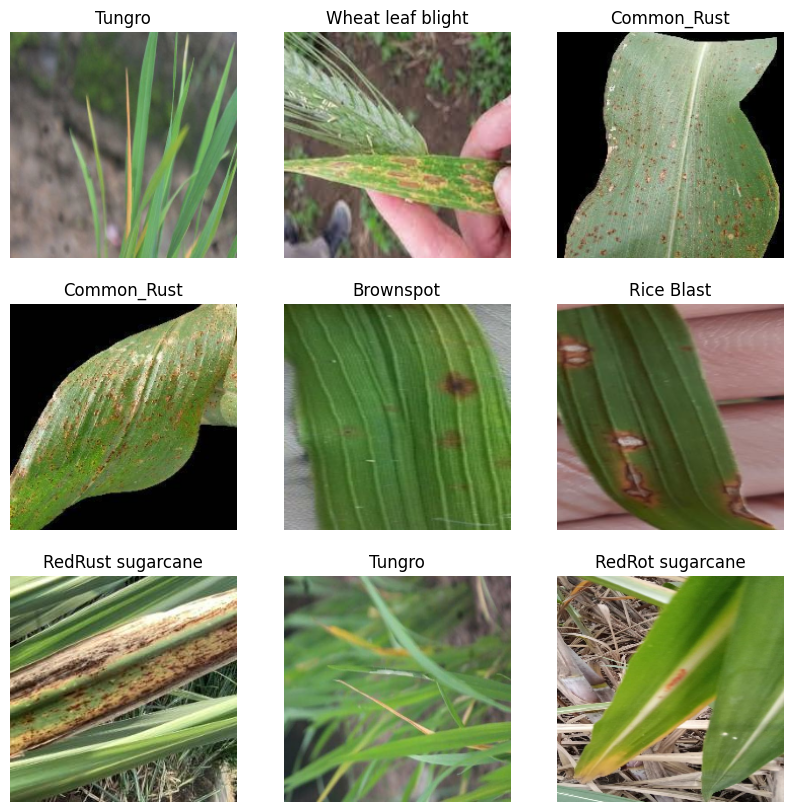

In [53]:
# ----------------------------
# Dataset parameters
# ----------------------------
img_height, img_width = 224, 224
batch_size = 32

# ----------------------------
# Load datasets
# ----------------------------
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_folder,
    labels="inferred",
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_folder,
    labels="inferred",
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

# ----------------------------
# Save class names and normalize images
# ----------------------------
class_names = train_ds_raw.class_names
print("Classes:", class_names)
print("Number of classes:", len(class_names))

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds_raw.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds_raw.map(lambda x, y: (normalization_layer(x), y))

# ----------------------------
# Preview some images
# ----------------------------
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
plt.show()


In [43]:
# ----------------------------
# Define CNN model
# ----------------------------
num_classes = len(class_names)

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 42)             │         5,418 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,174,378 (42.63 MB)

 Trainable params: 11,174,378 (42.63 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# tarining
# ----------------------------
# Train the model
# ----------------------------
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)



Epoch 1/10


483/483 ━━━━━━━━━━━━━━━━━━━━ 408s 840ms/step - accuracy: 0.4376 - loss: 2.1606 - val_accuracy: 0.0381 - val_loss: 4.7904
Epoch 2/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 394s 740ms/step - accuracy: 0.6351 - loss: 1.3564 - val_accuracy: 0.0426 - val_loss: 5.1038
Epoch 3/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 374s 774ms/step - accuracy: 0.7256 - loss: 0.9981 - val_accuracy: 0.0700 - val_loss: 5.7267
Epoch 4/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 353s 731ms/step - accuracy: 0.7854 - loss: 0.7492 - val_accuracy: 0.0880 - val_loss: 8.0247
Epoch 5/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 353s 730ms/step - accuracy: 0.8379 - loss: 0.5609 - val_accuracy: 0.1248 - val_loss: 8.0927
Epoch 6/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 368s 761ms/step - accuracy: 0.8621 - loss: 0.4602 - val_accuracy: 0.1390 - val_loss: 9.2699
Epoch 7/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 358s 741ms/step - accuracy: 0.8925 - loss: 0.3593 - val_accuracy: 0.1561 - val_loss: 10.5259
Epoch 8/10
483/483 ━━━━━━━━━━━━━━━━━━━━ 354s 733ms/step - accuracy: 0.9096 - loss: 0.2

In [56]:
# Save the trained model
model.save("crop_disease_model_final.h5")
print("Model saved successfully!")

Model saved successfully!
